In [1]:
%load_ext autoreload
%autoreload 2

In [49]:
from data_utils import read_mtx
from graph_utils import plot_graph, graph_info, get_modularity, plot_degree_distribution

In [3]:
g = read_mtx('bio-celegans.mtx')

In [57]:
graph_info(g);

Num nodes:  453
Num edges:  2024
Avg degree:  8.936
Clustering coef:  0.646


In [64]:
ux = nx.Graph(x)

In [68]:
ux['1']

AtlasView({'1': {'weight': 1.0}})

In [59]:
x = nx.read_weighted_edgelist('bio-human-gene2.edges', comments='%')

In [61]:
graph_info(x)

KeyboardInterrupt: 

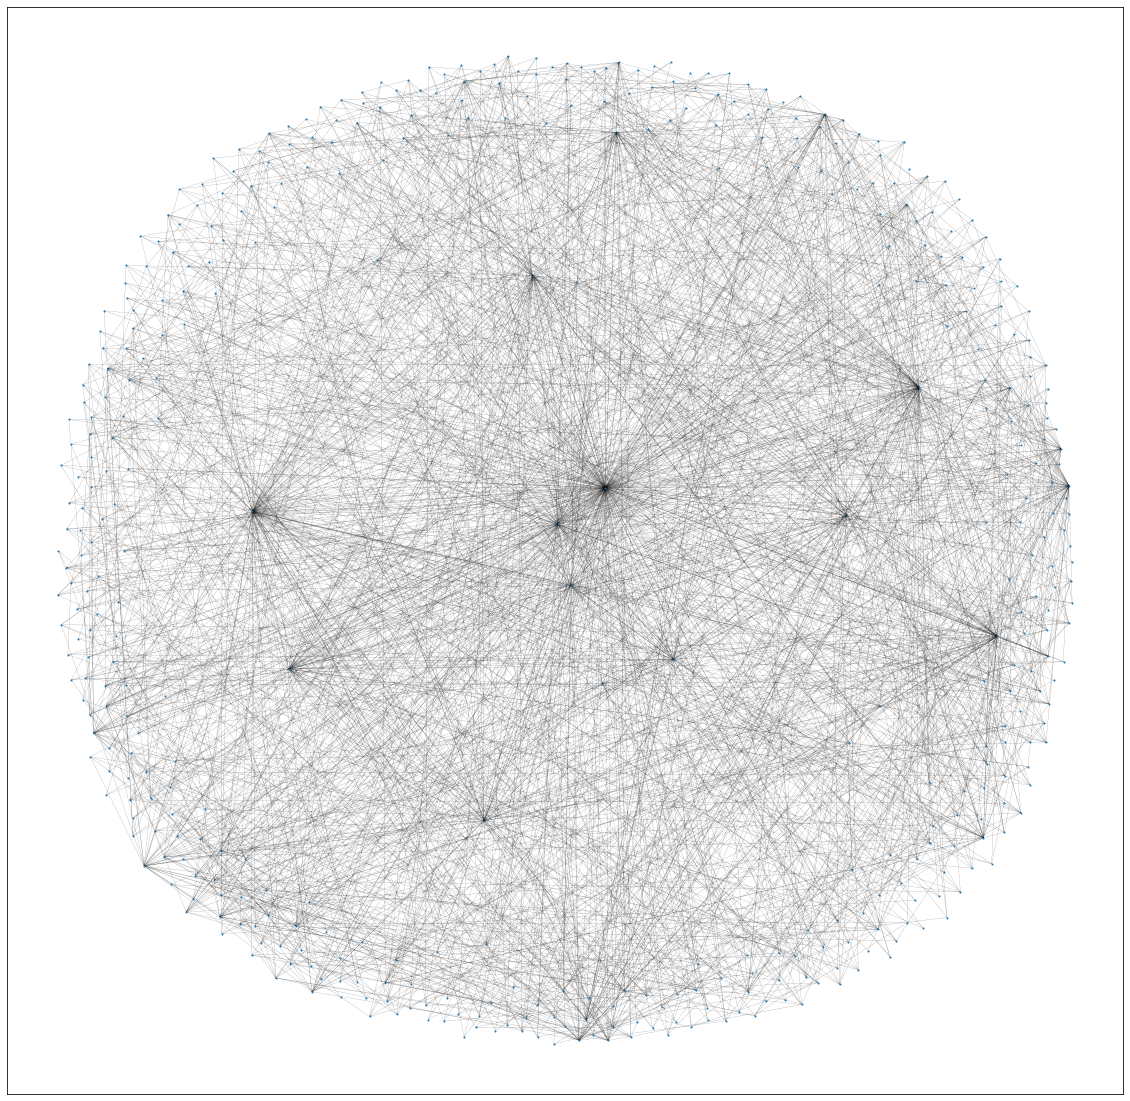

In [34]:
plot_graph(g)

In [45]:
import networkx.algorithms.community as nx_comm

In [48]:
get_modularity(G, nx_comm.label_propagation_communities(G))

0.050952795700604646

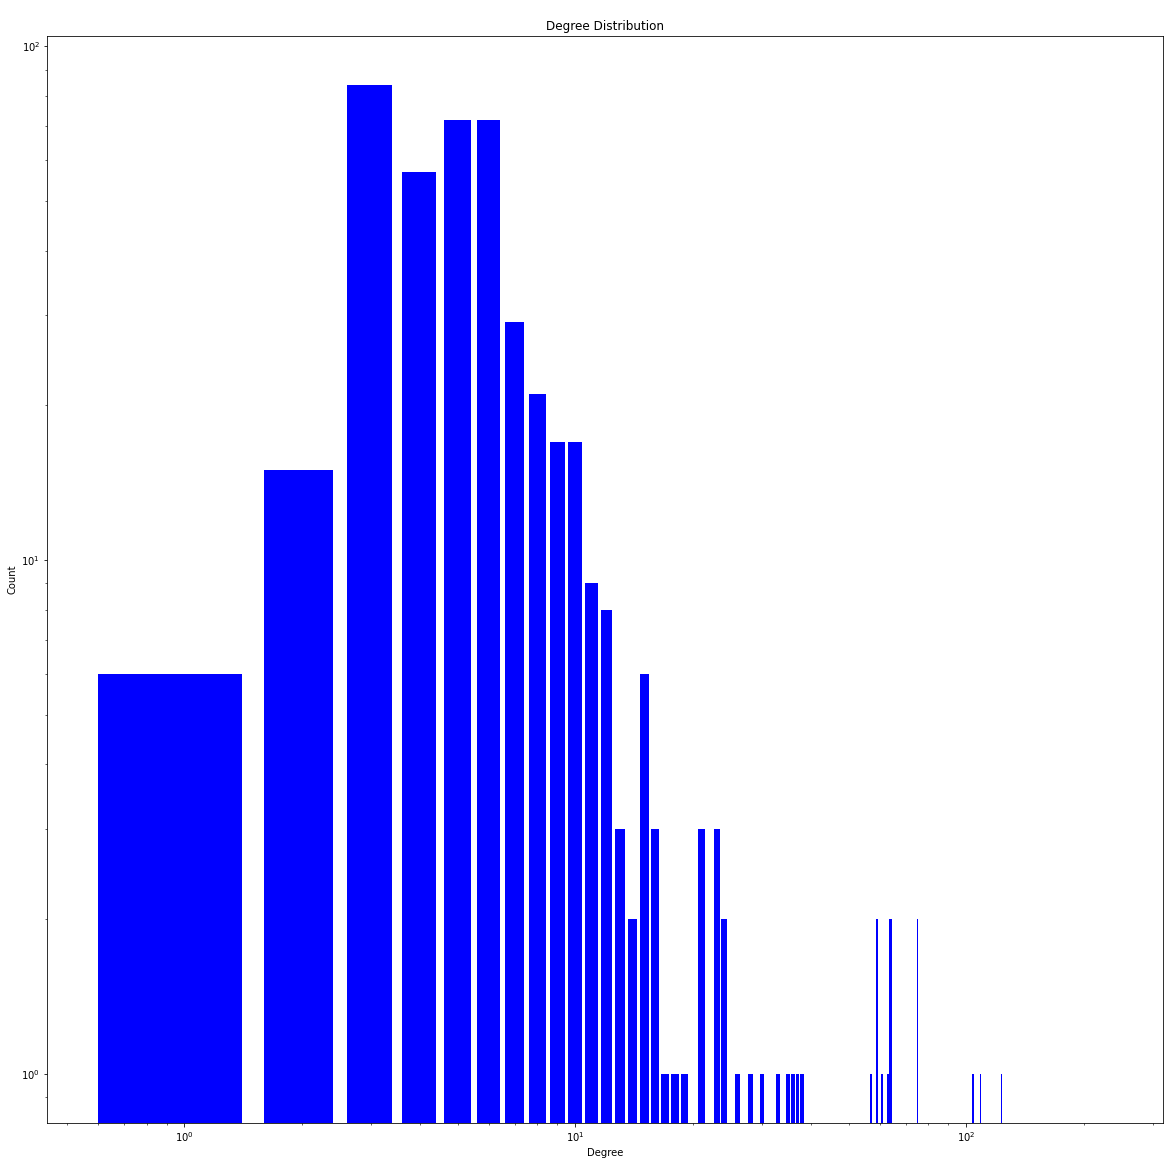

In [50]:
plot_degree_distribution(g)